## Avacado Project

## Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. <br>
<br>
<b>Content</b><br>

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. <br>
<br>
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:<br>
<br>
Date - The date of the observation<br>
AveragePrice - the average price of a single avocado<br>
type - conventional or organic<br>
year - the year<br>
Region - the city or region of the observation<br>
Total Volume - Total number of avocados sold<br>
4046 - Total number of avocados with PLU 4046 sold<br>
4225 - Total number of avocados with PLU 4225 sold<br>
4770 - Total number of avocados with PLU 4770 sold<br>
<br>
<b>Inspiration /Label</b> <br>
<br>
Your task is to make a mode that can consider the data provided and predict the Average Price.<br>

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing dataset
df = pd.read_csv('avocado.csv')
df

In [ ]:
# checking the shape of dataset
df.shape

 - We've 16468 rows and 14 columns

In [ ]:
df.columns

## Briefed of Dataset

Some relevant columns in the dataset:<br>
<br>
Date - The date of the observation<br>
AveragePrice - the average price of a single avocado<br>
type - conventional or organic<br>
year - the year<br>
Region - the city or region of the observation<br>
Total Volume - Total number of avocados sold<br>
4046 - Total number of avocados with PLU 4046 sold<br>
4225 - Total number of avocados with PLU 4225 sold<br>
4770 - Total number of avocados with PLU 4770 sold<br>

In [ ]:
df.dtypes

 - We've float type target variable and others are object and float types both

## EDA

In [ ]:
# checking null values

import seaborn as sns
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

 - Our dataset has 14951 empty rows,let's remove it

In [ ]:
df_new = df[df.notnull().any(axis=1)]

In [ ]:
df_new.head()

In [ ]:
df_new.shape

 - After removing 14951 empty rows, we have 1517 rows.

In [ ]:
df_new.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_new.head()

In [ ]:
# describing thr data
df_new.describe()

 - The data has been observed.

## Univariat Analysis

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print('Total number of regions are : ',len(df['region'].unique()))
plt.figure(figsize=(15,5))
ax = sns.countplot(x='region',data=df_new)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Avacado sales in different regions : ',fontsize=20)
plt.show()

 - Californis has highest sales whereas Los Angeles have the leadt one.

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='type',data=df_new)
plt.title('Avacado sales product type',fontsize=20)
plt.show()

 - Avacado have conventional type of product only.

In [ ]:
sns.countplot(x='year',data=df_new)

 - Avacado have 2 years 2015 & 2016
 - In 2015 sale was more and less in 2016

## Bivariat Analysis

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='AveragePrice',y='Total Volume',data=df_new)

 - The majority of total values lies under 1

In [ ]:
df_new['Date'] = pd.to_datetime(df_new['Date'],errors='coerce')
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='Date',y='AveragePrice',data=df_new)
plt.title('Fluctuation of price with respect to date',fontsize=20)
plt.show()

 - As we can see from above plot, the price incresed from 2016-04

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='Date',y='4046',data=df_new)
plt.title('The number of avacados with 4046 sold with respect to date ',fontsize=20)
plt.show()

 - 4046 drops at the beginning of the year.
 - From start to last the number avacados 4046 sold decreased.

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='Date',y='4225',data=df_new)
plt.title('The number of avacados with 4225	 sold with respect to date ',fontsize=20)
plt.show()

 - 4225 drops at the beginning of the year.
 - From start to last the number avacados 4225 sold decreased.

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='Date',y='4770',data=df_new)
plt.title('The number of avacados with 4770 sold with respect to date ',fontsize=20)
plt.show()

 - 4770 drops at the beginning of the year.
 - From start to last the number avacados 4770 sold decreased.

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='AveragePrice',y='Total Bags',data=df_new)

 - Majority of bags prices lies under 30,00,000

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='AveragePrice',y='4046',data=df_new)

 - Majority of 4046 lies under 50,00,000

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='AveragePrice',y='4225',data=df_new)

In [ ]:
 - Majority of 4225 lies under 25,00,000

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='AveragePrice',y='4770',data=df_new)

 - Majority of 4770 lies under 4,00,000

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='AveragePrice',y='Small Bags',data=df_new)

 - Majority of Small Bags lies under 20,00,000

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='AveragePrice',y='Large Bags',data=df_new)

 - Majority of Large Bags lies under 4,00,000

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='AveragePrice',y='XLarge Bags',data=df_new)

 - Almost XLarge Bags lies under 60,000.
 - Only 2 bags lies above 60,000

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='region',y='AveragePrice',data=df_new)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## Multi-Variat Analysis

In [ ]:
fig = plt.figure(figsize=(20,10))
hc = df_new.corr(method='pearson')
sns.heatmap(hc,annot=True)
plt.title('Correlation Matrix')
plt.show()

 - There is not much correlation with AveragePrice and other column

In [ ]:
# Correlation of averageprice with respect to other attributes
df_new.corrwith(df_new.AveragePrice).plot.bar(
    figsize=(20,8),title='Correlation with age graph',fontsize=12,
    rot=30,grid=True)

 - At very low level 4046,large bags and year have correlation.

## Data Cleaning

In [ ]:
import datetime as dt
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new['Date'] = df_new['Date'].map(dt.datetime.toordinal)
df_new.head()

 - converted date into ordinal date

In [ ]:
df_new.dtypes

In [ ]:
df_new.drop('year',axis=1,inplace=True)

In [ ]:
df_new['type'].unique()

In [ ]:
df_new.drop('type',axis=1,inplace=True)

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_new['region'] = oe.fit_transform(df_new['region'].values.reshape(-1,1))

In [ ]:
df_new.head()

In [ ]:
## Shuffling the dataset
df_new = df_new.sample(frac=1,random_state=0)

In [ ]:
df_new.head()

In [ ]:
df_new.skew()

In [ ]:
# reducing the skewness of Total Volume using log
import numpy as np
df_new['Total Volume'] = np.log(df_new['Total Volume'])

In [ ]:
df_new['Total Volume'].skew()

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in df_new.columns:
    if df_new[i].dtypes != 'object':
        if((len(pd.unique(df_new[i])))>2):
            if abs(df_new.loc[:,i].skew())>0.5:
                df_new.loc[:,i]=pt.fit_transform(df_new.loc[:,i].values.reshape(-1,1))

In [ ]:
df_new.skew()

In [ ]:
# checking the outliers again
import matplotlib.pyplot as plt
import seaborn as sns
df_new.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df_new))
print(np.where(z>3))

In [ ]:
# checking the shape again
data = df_new[(z<3).all(axis=1)]
print(df_new.shape)
print(data.shape)

In [ ]:
# checking how much data is lost
loss_percent = (1517-1512)/1517*100
print(loss_percent)

 - We lost less than 1%, which is ok.

## Split data in features and label

In [ ]:
x = data.drop('AveragePrice',axis=1)
y = data['AveragePrice']

In [ ]:
x

In [ ]:
y

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new = scaler.fit(x)
scale_x = new.transform(x)
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head()

 - After scaling our data is in 0 to 1 range. It's now very convinient to train and test our data.

## Finding Best Random State

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

maxR2_score = 0
maxRS = 0 

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    predictrf = lr.predict(x_test)
    score = r2_score(y_test,predictrf)
    if score > maxR2_score:
        maxR2_score = score
        maxRS = i
print('Best Accuracy is',maxR2_score,'on Random State',maxRS)

## Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=maxRS)

## Finding Best Algorithm

In [ ]:
# importing all the required libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [ ]:
model = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),Ridge(),SVR()]

In [79]:
for i in model:
    print('----------------------------------------------------------------')
    print('accuracy score : ',i)
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print('R2 Score : ',r2_score(y_test,pred))
    print('Mean Absolute Error : ',mean_squared_error(y_test,pred))
    print('Mean Squared Error : ',mean_absolute_error(y_test,pred))
    print('Root mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred)))
    score = cross_val_score(i,x,y,cv=8)
    print(score)
    print('Cross validation score : ',score.mean())
    print('Difference between CVS and R2 score is : ',r2_score(y_test,pred)-abs(score.mean()))
    print('----------------------------------------------------------------')

----------------------------------------------------------------
accuracy score :  LinearRegression()
R2 Score :  0.43120756594268905
Mean Absolute Error :  0.020364207429421494
Mean Squared Error :  0.11048861282471406
Root mean Squared Error :  0.14270321450276266
[0.25609259 0.31219646 0.4244346  0.34403687 0.36967193 0.3939973
 0.41992386 0.33944614]
Cross validation score :  0.3574749697272302
Difference between CVS and R2 score is :  0.07373259621545886
----------------------------------------------------------------
----------------------------------------------------------------
accuracy score :  RandomForestRegressor()
R2 Score :  0.7808179709122897
Mean Absolute Error :  0.007847270881057281
Mean Squared Error :  0.06240000000000005
Root mean Squared Error :  0.08858482308531908
[0.7950126  0.81445989 0.83799801 0.83374533 0.8546271  0.80253393
 0.83585009 0.79288701]
Cross validation score :  0.8208892441600764
Difference between CVS and R2 score is :  -0.0400712732477867
--

 - Random Forest Regressor has high accuracy and cross validation score is 82%

## Hyper Parameter Tuning

In [82]:
# import the randomized search CV 
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth' : np.arange(2,20), 'max_features':['sqrt','auto','log2'], 'n_estimators':[100,200,500],'criterion':['mse','mae']}

In [83]:
clf = RandomizedSearchCV(RandomForestRegressor(),parameters,cv=8)
clf.fit(x_train,y_train)
clf.best_params_

{'n_estimators': 500,
 'max_features': 'sqrt',
 'max_depth': 16,
 'criterion': 'mse'}

In [84]:
clf_pred = clf.best_estimator_.predict(x_test)

In [86]:
r2_score(y_test,clf_pred)

0.7923577216691239

 - our model leant almost 79.23%

## Saving the Model

In [88]:
import joblib

joblib.dump(clf.best_estimator_,'Avocado.obj')
RF_from_joblib = joblib.load('Avocado.obj')
predicted = RF_from_joblib.predict(x_test)
predicted

array([1.17136137, 1.12963911, 1.10988726, 1.13035   , 1.09503542,
       1.17481919, 0.90718802, 1.14816448, 1.11716417, 1.10021664,
       1.21167917, 1.02497654, 1.01997145, 1.33279785, 1.16104109,
       0.95786729, 1.09081853, 1.429215  , 1.09643326, 1.17374863,
       1.23805334, 1.25210925, 1.0968451 , 1.10537972, 0.79762667,
       1.22303333, 1.07480634, 1.34937466, 1.05937794, 1.01062659,
       0.9148216 , 0.77390417, 1.04664378, 0.6834535 , 1.12679163,
       1.04574297, 0.96326   , 0.93072202, 1.13915874, 1.37132358,
       1.18479611, 1.07107586, 0.99974312, 1.13858691, 1.0042585 ,
       0.84324619, 1.05612349, 1.04202476, 1.20034824, 1.14560904,
       0.86419667, 1.17659513, 1.17865406, 1.18378325, 1.1452728 ,
       1.03232978, 1.10059136, 0.92786162, 1.0585916 , 1.05724292,
       1.10645793, 1.04325824, 1.07212706, 0.96995086, 0.74700471,
       1.13968988, 0.7886575 , 1.29676   , 1.039055  , 1.1316832 ,
       1.04215864, 1.21903299, 1.1208356 , 1.19276221, 1.10656

In [89]:
pd.set_option('display.max_rows',None,'display.max_columns',None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453
Predicted,1.171361,1.129639,1.109887,1.13035,1.095035,1.174819,0.907188,1.148164,1.117164,1.100217,1.211679,1.024977,1.019971,1.332798,1.161041,0.957867,1.090819,1.429215,1.096433,1.173749,1.238053,1.252109,1.096845,1.10538,0.797627,1.223033,1.074806,1.349375,1.059378,1.010627,0.914822,0.773904,1.046644,0.683453,1.126792,1.045743,0.96326,0.930722,1.139159,1.371324,1.184796,1.071076,0.999743,1.138587,1.004258,0.843246,1.056123,1.042025,1.200348,1.145609,0.864197,1.176595,1.178654,1.183783,1.145273,1.03233,1.100591,0.927862,1.058592,1.057243,1.106458,1.043258,1.072127,0.969951,0.747005,1.13969,0.788658,1.29676,1.039055,1.131683,1.042159,1.219033,1.120836,1.192762,1.106566,1.159298,1.022786,0.92066,1.019194,1.12817,1.033255,1.173769,1.101088,1.088435,1.112717,1.297834,1.111479,1.31286,1.149556,1.183437,1.02874,0.847118,1.181354,1.068868,0.917088,0.834181,1.14219,0.900658,0.74022,1.158041,1.080912,1.021723,1.00628,1.206637,1.247405,0.710939,1.286524,1.096555,1.122753,1.146844,1.014467,1.351609,1.038504,0.795538,0.863911,1.091921,1.138273,1.279742,0.993465,1.033621,1.311834,1.062644,0.899003,1.126241,1.02818,1.278224,1.006398,1.05847,1.011459,1.417212,1.336353,1.130861,1.150984,1.072563,0.96917,1.154787,1.011294,0.67668,0.6642,1.147194,1.045319,1.077405,1.07501,1.155014,1.182877,1.239302,1.15651,1.14176,1.356023,1.16262,1.057872,1.464928,1.01498,0.868053,1.343789,1.135114,1.067663,1.109478,1.036363,1.419434,1.151918,1.061701,1.204366,0.788076,1.243231,1.052,0.993871,1.4261,1.099113,1.030275,1.211101,1.304152,1.161994,1.010058,1.1499,1.330817,1.380561,1.287629,1.020917,0.991875,1.136485,1.143467,0.8255,1.185713,1.069337,1.224937,1.100125,0.767114,0.731474,1.166662,0.78712,1.037535,1.147063,1.165169,1.235985,1.384201,1.013875,1.006448,1.054504,0.842004,1.047105,1.087149,1.05619,1.091201,1.103173,0.912021,1.098209,1.088026,1.076606,1.02916,0.97008,1.029729,1.065112,1.13027,1.202309,1.090526,1.06294,1.2317,1.323693,1.132127,1.09371,1.222141,1.157018,1.049793,1.087091,1.100948,1.037957,1.089238,0.92719,1.077693,1.014058,1.180681,1.017307,1.079244,1.090454,1.230769,1.018545,0.733349,1.178775,1.074081,0.74527,1.137319,1.09664,1.196983,1.077801,1.32733,1.260153,1.057975,1.021007,1.45114,1.163263,1.089427,1.048594,0.60044,1.244829,0.768151,0.83311,1.112987,1.154647,0

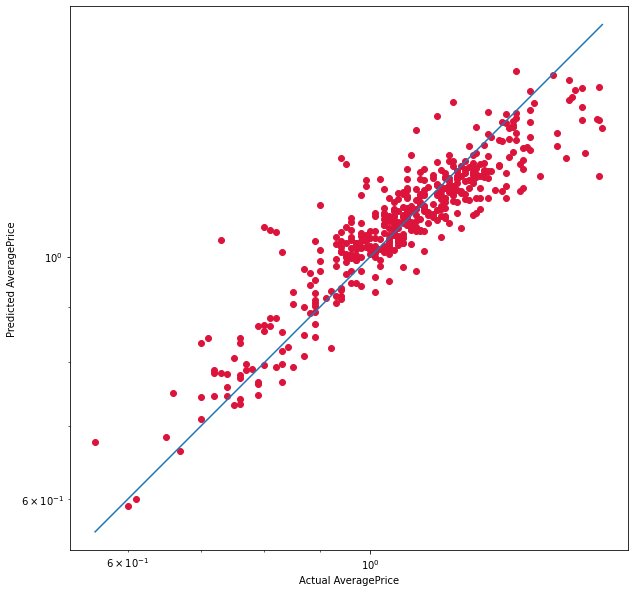

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,predicted,c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(predicted),max(y_test))
p2 = min(min(predicted),min(y_test))
plt.plot([p1,p2],[p1,p2])
plt.xlabel('Actual AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.axis('equal')
plt.show()